In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression


# Load the dataset
dataset = pd.read_csv("//home//lydianjay//Documents//Data mining//dataset//penguins.csv")
dataset.replace('NA', np.nan, inplace = True)
dataset.replace(' ', np.nan, inplace = True)
dataset.dropna( inplace = True, how = 'any')
dataset = dataset[dataset.sex != '.']

X = dataset[['bill_length_mm', 'flipper_length_mm']]
y = dataset['body_mass_g']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
dataset.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


/home/lydianjay/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


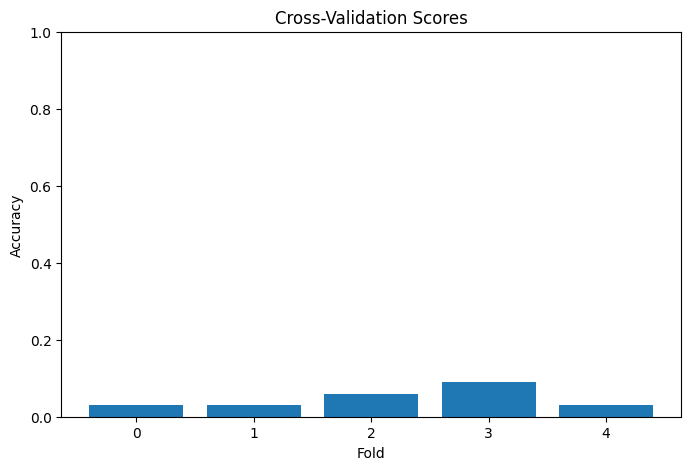

In [7]:
# Create a logistic regression classifier
classifier = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)

plt.figure(figsize=(8, 5))
plt.bar(range(len(cv_scores)), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim([0, 1])
plt.show()
